# The Impact of COVID-19 Era Data on Machine Learning Classification Accuracy When Predicting Crime Location in Washington, D.C. 
### DATA 602: Introduction to Data Analysis and Machine Learning
Authors: Joanne Choi, Sam Clark, Peter Kirk, William Simpson, Levan Sulimanov

Github: [DC Crime Analysis](https://github.com/joannechoi/DC-Crime-Analysis)

### Import libraries

In [3]:
!pip install geopandas

In [4]:
!pip install geopy

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')
#from google.colab import files
import pandas as pd
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import copy
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
import geopandas as gpd
import openpyxl
from shapely.geometry import Point, Polygon
from pyproj import CRS
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import statsmodels.api as sm
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon
import sys
from statistics import mean
sys.setrecursionlimit(1500)

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


### Import Data & Preprocess Data
Following datasets were used to create the final dataset. The final dataset was exported as csv file before it was used for analysis. The data preprocessing code are commented out to save on computational time. 

In [ ]:
#DC crime incidents datasets between 2017-2021 from Open Data DC
# merged = pd.concat(
#    map(pd.read_csv, ['https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2017.csv',
#                      'https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2018.csv',
#                      'https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2019.csv',
#                      'https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2020.csv', 
#                      'https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2021.csv']), 
#                   ignore_index=True)

#download dataframe into a csv file
# merged.to_csv ('MergedData_2017-2021.csv', index = False, header=True)
# files.download("MergedData_2017-2021.csv")

#drop unnecessary columns
# df_crime = merged.drop(['X', 'Y', 'CCN', 'ANC', 'PSA', 'CENSUS_TRACT', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 
#                         'VOTING_PRECINCT', 'BID', 'OBJECTID',	'OCTO_RECORD_ID' ], axis = 1)

#DC Covid Statistics data
# df_covid_ward = pd.read_excel('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/DC-COVID-19-Data-for-11-5-2021.xlsx', sheet_name = 'Total Cases by Ward', engine='openpyxl')
# df_covid_death = pd.read_excel('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/DC-COVID-19-Data-for-11-5-2021.xlsx', sheet_name = 'Lives Lost by Ward', engine='openpyxl')

#DC Police 
# df_sick_police = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/daily_count_police_out_due_to_covid.csv')

#DC metro station dataset from Open Data DC
# metro = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Metro_Stations_in_DC.csv')

#DC night club dataset from Open Data DC
# nightlife = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Night_Club.csv')

#DC places of worship
# worship = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/places_of_worship.csv')

In [ ]:
# cleanse crime incidents 

# del df_crime['REPORT_DAT']
# del df_crime['BLOCK']
# del df_crime['YBLOCK']
# del df_crime['XBLOCK']
# del df_crime['END_DATE']
# del df_crime['METHOD']
# del df_crime['DISTRICT']
# df_crime = df_crime.rename(columns = {'START_DATE':'date'})
# df_crime['date'] = pd.to_datetime(df_crime['date']).dt.date
# df_crime['date'] = pd.to_datetime(df_crime['date'])

# drop records with null records
# df_crime = df_crime.dropna(axis=0)

In [ ]:
# cleanse crime incidents 

# df_covid_ward = df_covid_ward.transpose()
# df_covid_ward.reset_index(drop = True, inplace= True)
# df_covid_ward.columns=('date', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8', 'unknown')
# df_covid_ward = df_covid_ward.iloc[1: , :]
# df_covid_ward['date'] = pd.to_datetime(df_covid_ward['date'])
# df_covid_ward['total_cases'] = (df_covid_ward['ward_1'] + df_covid_ward['ward_2'] + df_covid_ward['ward_3'] + df_covid_ward['ward_4'] + df_covid_ward['ward_5'] + df_covid_ward['ward_6'] +df_covid_ward['ward_7'] + df_covid_ward['ward_8'] +df_covid_ward['unknown'])
# df_covid_ward['daily_cases'] = df_covid_ward['total_cases'].diff(1)

# del df_covid_ward['ward_1']
# del df_covid_ward['ward_2']
# del df_covid_ward['ward_3']
# del df_covid_ward['ward_4']
# del df_covid_ward['ward_5']
# del df_covid_ward['ward_6']
# del df_covid_ward['ward_7']
# del df_covid_ward['ward_8']
# del df_covid_ward['unknown']

# df_covid_ward.fillna(0, inplace=True)

In [ ]:
# cleanse death data

# df_covid_death = df_covid_death.transpose()
# df_covid_death.reset_index(drop = True, inplace= True)
# df_covid_death.columns=('date', 'all', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8', 'Experienced Homelessness', 'unknown', 'na')
# df_covid_death = df_covid_death.iloc[1: , :]
# df_covid_death['date'] = pd.to_datetime(df_covid_death['date'])
# df_covid_death['daily_death'] = df_covid_death['all'].diff(1)

# del df_covid_death['ward_1']
# del df_covid_death['ward_2']
# del df_covid_death['ward_3']
# del df_covid_death['ward_4']
# del df_covid_death['ward_5']
# del df_covid_death['ward_6']
# del df_covid_death['ward_7']
# del df_covid_death['ward_8']
# del df_covid_death['unknown']
# del df_covid_death['na']
# del df_covid_death['Experienced Homelessness']
# del df_covid_death['all']

# df_covid_death.fillna(0, inplace=True)

In [ ]:
# cleanse sick police

# df_sick_police = df_sick_police.rename(columns = {'DATE_REPORTED':'date'})
# df_sick_police['date'] = pd.to_datetime(df_sick_police['date'])

# df_sick_police.fillna(0, inplace=True)

In [ ]:
# merge the dataframes together
# merged = df_crime.merge(df_covid_ward, how='left', on = 'date').merge(df_covid_death, how='left', on = 'date').merge(df_sick_police, how='left', on = 'date')

# create dummy data

# getting weekday dummies
# merged['weekday'] = merged['date'].dt.dayofweek
# dummy0 = pd.get_dummies(merged['weekday'])
# dummy0.columns = ['MO', 'TU', 'WE', 'TH', 'FR', 'SA', 'SU']
# merged = pd.concat([merged, dummy0] , axis = 1)
# del merged['weekday']

# # get month dummies
# merged['month'] = merged['date'].dt.month
# dummy1 = pd.get_dummies(merged['month'])
# dummy1.columns = ['JAN', 'FEB','MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP','OCT', 'NOV', 'DEC']              
# merged = pd.concat([merged, dummy1] , axis = 1)
# del merged['month']

# # ward dummies
# dummy2 = pd.get_dummies(merged['WARD'])
# dummy2.columns = ['ward_1', 'ward_2','ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8']              
# merged = pd.concat([merged, dummy2] , axis = 1)

# # offense dummies
# dummy3 = pd.get_dummies(merged['OFFENSE'])
# merged = pd.concat([merged, dummy3] , axis = 1)

# # shift dummies
# dummies4 = pd.get_dummies(merged.SHIFT)
# merged = pd.concat([merged, dummies4], axis=1)

# # replace nan with 0
# merged.fillna(0, inplace=True)

In [ ]:
# creating new column for tuple of x and y coordinates
# merged['coords'] = tuple(zip(merged.LONGITUDE, merged.LATITUDE))
# metro['coords2'] = tuple(zip(metro.X, metro.Y))

In [ ]:
# join place of worship distance into crime data
# df_metro_nightclub_worship = pd.concat([df_metro_nightclub, df_worship], axis=1)
# del df_metro_nightclub_worship['index']

In [ ]:
# calculate the distance between each crime incident to the closest metro stations

# distance_metro = []
# for index, row in merged.iterrows():
#    for index2, row2 in metro.iterrows():
#        x = geodesic(row['coords'], row2['coords2']).miles
#        z = [index, index2, x]
#        distance_metro.append(z)
# df = pd.DataFrame(distance_metro, columns = ['index', 'metro_stop_id', 'distance_metro'])
# df2 = df.groupby(['index'], as_index=False).agg({'distance_metro':'min'})

# merge metro distance from metro to main dataset

# df3 = pd.concat([merged, df2], axis=1)
# del df3['coords']
# del df3['index']

# calculate the distance between each crime incident to the closest nightlife location

# nightlife['coords3'] = tuple(zip(nightlife.LONGITUDE, nightlife.LATITUDE))
# distance_nightclubs = []
# for index, row in merged.iterrows():
#    for index2, row2 in nightlife.iterrows():
#        x = geodesic(row['coords'], row2['coords3']).miles
#        z = [index, index2, x]
#        distance_nightclubs.append(z)
# df = pd.DataFrame(distance_nightclubs, columns = ['index', 'nightclub_id', 'distance_nightclubs'])
# df_clubs = df.groupby(['index'], as_index=False).agg({'distance_nightclubs':'min'})

# merge nightclub distance from metro to main dataset

# df_metro_nightclub = pd.concat([df3, df_clubs], axis=1)
# del df_metro_nightclub['index']

# calculate the distance between each crime incident to the closest place of worship location

# worship['coords4'] = tuple(zip(worship.long, worship.lat))
# distance_worship = []
# for index, row in merged.iterrows():
#    for index2, row2 in worship.iterrows():
#        x = geodesic(row['coords'], row2['coords4']).miles
#        z = [index, index2, x]
#        distance_worship.append(z)
# df = pd.DataFrame(distance_worship, columns = ['index', 'worship_id', 'distance_worship'])
# df_worship = df.groupby(['index'], as_index=False).agg({'distance_worship':'min'})

# merge place of worship distance from metro to main dataset

# df_metro_nightclub_worship = pd.concat([df_metro_nightclub, df_worship], axis=1)
# del df_metro_nightclub_worship['index']

In [ ]:
# split data into covid not covid

# covid_start_date = pd.to_datetime("2020-03-11").date()
# df_metro_nightclub_worship['date'] = pd.to_datetime(df_metro_nightclub_worship['date']).dt.date

# pre_covid_time = df_metro_nightclub_worship[(df_metro_nightclub_worship['date'] <= covid_start_date)]
# covid_time = df_metro_nightclub_worship[(df_metro_nightclub_worship['date'] > covid_start_date)] 

In [ ]:
# export the dataframes to csv files

# pre_covid_time.to_csv(os.path.join(data_dir, 'precovid_crime_micro_geo_11_29_2021.csv'))
# covid_time.to_csv(os.path.join(data_dir, 'covid_crime_micro_geo_11_29_2021.csv'))

#### Import in the final dataset 

In [9]:
# import overall crime data
merged = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Merged/MergedData_2017-2021.csv')

# import Pre-Covid and Covid datasets
precovid = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Merged/precovid_crime_micro_geo_11_29_2021.csv', index_col=False)
covid = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Merged/covid_crime_micro_geo_11_29_2021.csv', index_col=False)

print(precovid.shape)
print(covid.shape)

(104359, 53)
(43164, 53)


In [10]:
# shape datasets for crime hotspot analysis
border_map = gpd.read_file('/content/drive/MyDrive/shapefiles/Washington_DC_Boundary.shp')
street_map = gpd.read_file('/content/drive/MyDrive/shapefiles/Roads.shp')

DriverError: '/content/drive/MyDrive/shapefiles/Washington_DC_Boundary.shp' does not exist in the file system, and is not recognized as a supported dataset name.

In [11]:
# preview of the precovid data
precovid.sample(5)

,Unnamed: 0,SHIFT,OFFENSE,WARD,LATITUDE,LONGITUDE,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ward_1,ward_2,ward_3,ward_4,ward_5,ward_6,ward_7,ward_8,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
72022,72022,DAY,MOTOR VEHICLE THEFT,5.0,38.918106,-77.010664,2019-05-27,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.389029,0.275023,0.075368
461,461,EVENING,THEFT/OTHER,7.0,38.865336,-76.948181,2017-09-12,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0.539899,1.874233,0.127123
34523,34523,DAY,THEFT/OTHER,8.0,38.847782,-76.971907,2018-02-03,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.707187,1.106875,0.137450
1599,1599,MIDNIGHT,THEFT F/AUTO,2.0,38.902100,-77.022952,2017-01-09,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.092795,0.134928,0.036365
82738,82738,EVENING,ASSAULT W/DANGEROUS WEAPON,5.0,38.922042,-76.987198,2019-11-20,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.538179,0.399836,0.129058


In [12]:
# preview of the covid data
covid.sample(5)

,Unnamed: 0,SHIFT,OFFENSE,WARD,LATITUDE,LONGITUDE,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ward_1,ward_2,ward_3,ward_4,ward_5,ward_6,ward_7,ward_8,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
12097,113789,MIDNIGHT,MOTOR VEHICLE THEFT,5.0,38.909639,-77.010607,2020-08-03,12398.0,85.0,1.0,131.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.288516,0.169962,0.043017
13139,114900,EVENING,THEFT/OTHER,6.0,38.885316,-76.994963,2020-12-11,24643.0,286.0,4.0,161.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.072954,0.602731,0.055669
9568,111108,DAY,THEFT/OTHER,3.0,38.926662,-77.054306,2020-03-29,0.0,0.0,0.0,161.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.133061,0.428009,0.048373
16729,120195,MIDNIGHT,THEFT/OTHER,7.0,38.903482,-76.922943,2020-09-05,14279.0,41.0,0.0,72.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0.857529,3.430268,0.073442
37490,141845,DAY,THEFT/OTHER,2.0,38.914834,-77.040196,2021-05-09,48195.0,15.0,0.0,25.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.184103,0.146014,0.092778


### Exploratory Data Analysis

Crime count by type before Covid-19
------------------------------------
THEFT/OTHER                   46060
THEFT F/AUTO                  33638
MOTOR VEHICLE THEFT            7247
ROBBERY                        6560
ASSAULT W/DANGEROUS WEAPON     5193
BURGLARY                       4368
SEX ABUSE                       801
HOMICIDE                        472
ARSON                            20
Name: OFFENSE, dtype: int64


Crime count by type during Covid-19
------------------------------------
THEFT/OTHER                   16367
THEFT F/AUTO                  12809
MOTOR VEHICLE THEFT            5552
ROBBERY                        3168
ASSAULT W/DANGEROUS WEAPON     2636
BURGLARY                       2026
HOMICIDE                        332
SEX ABUSE                       261
ARSON                            13
Name: OFFENSE, dtype: int64


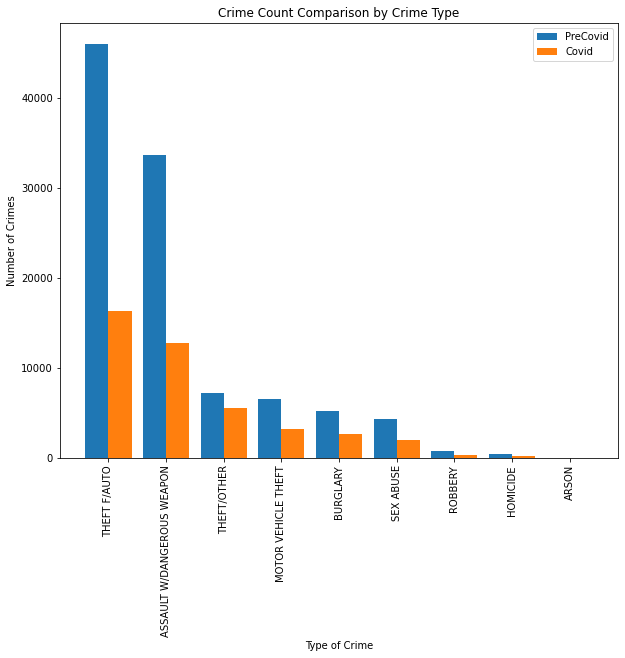

In [13]:
crimeTypes = precovid["OFFENSE"].unique()
precovid_types = precovid['OFFENSE'].value_counts()
covid_types = covid['OFFENSE'].value_counts()

print("Crime count by type before Covid-19")
print("------------------------------------")
print(precovid_types)
print('\n')
print("Crime count by type during Covid-19")
print("------------------------------------")
print(covid_types)

plt.figure(figsize=(10, 8))

x = np.arange(len(crimeTypes))
plt.bar(x - 0.2, precovid_types, 0.4, label = 'PreCovid')
plt.bar(x + 0.2, covid_types, 0.4, label = 'Covid')

plt.xticks(x, crimeTypes, rotation = 90)
plt.xlabel("Type of Crime")
plt.ylabel("Number of Crimes")
plt.title("Crime Count Comparison by Crime Type")
plt.legend()
plt.show()

Crime count by ward before Covid-19
------------------------------------
1.0    14776
2.0    19413
3.0     5908
4.0     9567
5.0    16016
6.0    16683
7.0    12540
8.0     9456
Name: WARD, dtype: int64


Crime count by ward during Covid-19
------------------------------------
1.0    5998
2.0    6712
3.0    2301
4.0    4101
5.0    6779
6.0    7683
7.0    5417
8.0    4173
Name: WARD, dtype: int64


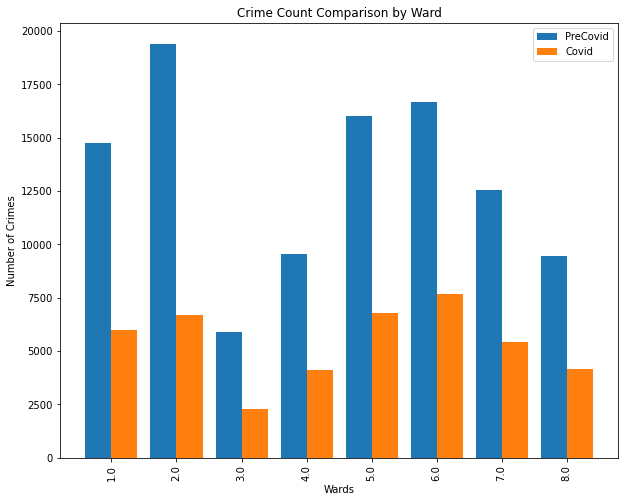

In [14]:
# view crime count by ward before and during covid
wards = precovid["WARD"].unique()
#x_wards = wards.sort()
precovid_wards = precovid['WARD'].value_counts().sort_index()
covid_wards = covid['WARD'].value_counts().sort_index()

print("Crime count by ward before Covid-19")
print("------------------------------------")
print(precovid_wards)
print('\n')
print("Crime count by ward during Covid-19")
print("------------------------------------")
print(covid_wards)

plt.figure(figsize=(10, 8))

x=np.arange(len(wards))
plt.bar(x - 0.2, precovid_wards, 0.4, label = 'PreCovid')
plt.bar(x + 0.2, covid_wards, 0.4, label = 'Covid')

plt.xticks(x, sorted(wards), rotation = 90)
plt.xlabel("Wards")
plt.ylabel("Number of Crimes")
plt.title("Crime Count Comparison by Ward")
plt.legend()
plt.show()

#### Crime Hotspot Analysis 

NameError: name 'border_map' is not defined

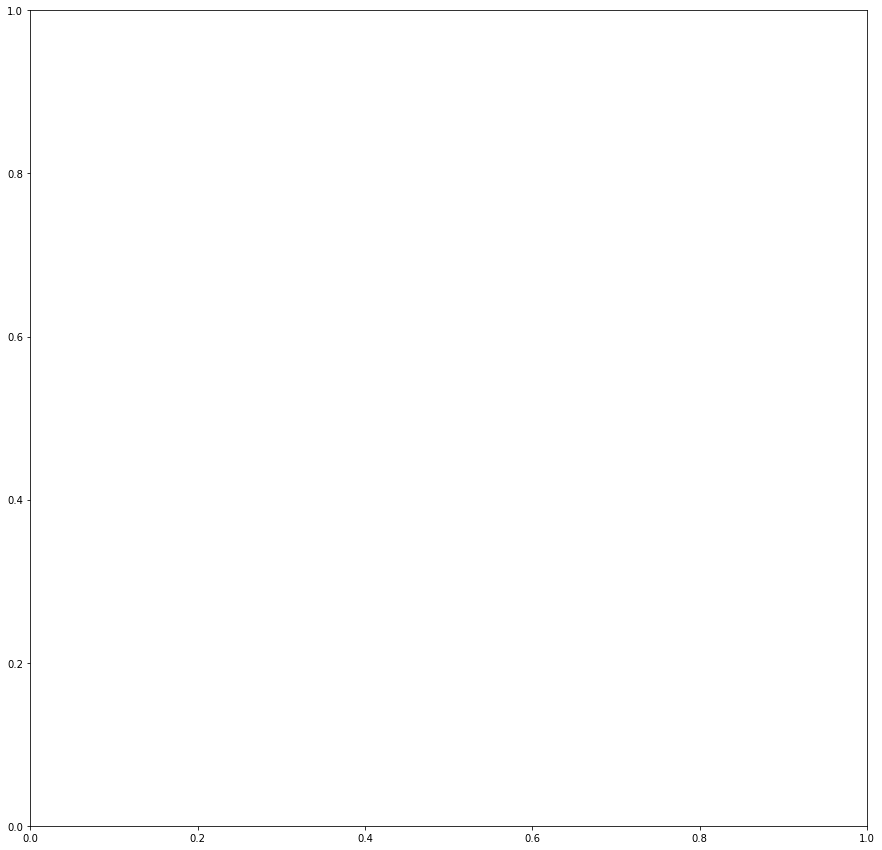

In [15]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.3, color='green')
street_map.plot(ax=ax, alpha=0.8, color='black')
# add title to graph
plt.title('DC Area', fontsize=15,fontweight='bold')
plt.show()

##### Process data for the crime hotspots

In [16]:
# sort and split by date
# convert each of the dates into datetime format:
merged['REPORT_DAT'] = pd.to_datetime(merged['REPORT_DAT'])
merged['START_DATE'] = pd.to_datetime(merged['START_DATE'])
merged['END_DATE'] = pd.to_datetime(merged['END_DATE'])

# store the sorted results into a new dataframe:
df_date_sorted = copy.deepcopy(merged)
df_date_sorted = df_date_sorted.set_index(df_date_sorted['START_DATE'])
df_date_sorted = df_date_sorted.sort_index()

View crime trends throughout the years

Text(0.5, 1.0, 'Year - 2017')

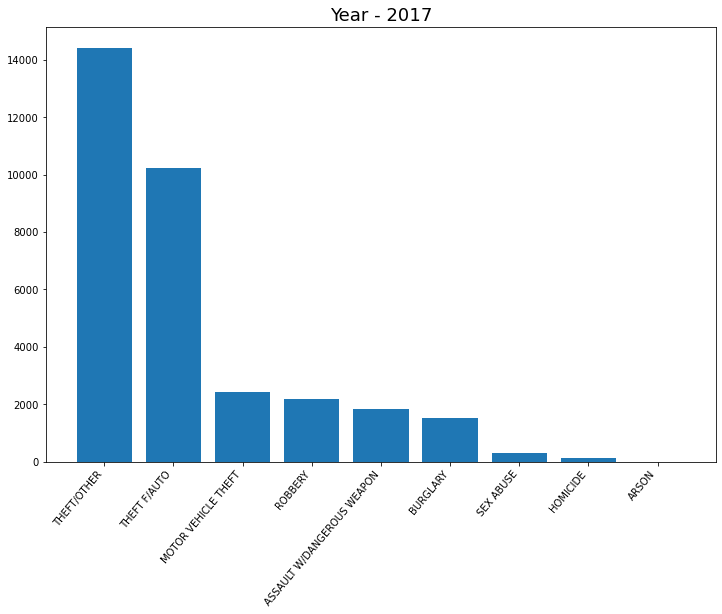

In [17]:
df_date_sorted_2017 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2017])
df_date_sorted_2017 = df_date_sorted_2017.set_index(df_date_sorted_2017['START_DATE'])
df_date_sorted_2017 = df_date_sorted_2017.sort_index()

classes_count_2017 = df_date_sorted_2017['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2017)), list(classes_count_2017.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2017.keys())))
ax.set_xticklabels(labels=list(classes_count_2017.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2017", fontsize=18)

Text(0.5, 1.0, 'Year - 2018')

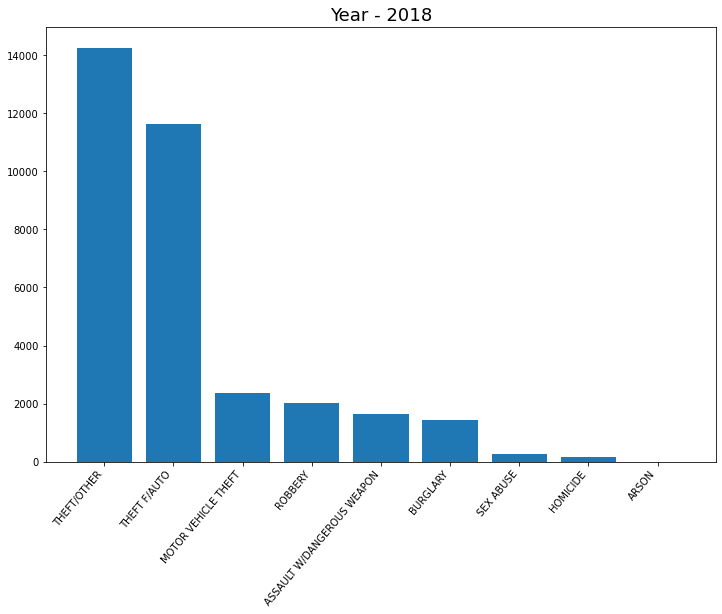

In [18]:
df_date_sorted_2018 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2018])
df_date_sorted_2018 = df_date_sorted_2018.set_index(df_date_sorted_2018['START_DATE'])
df_date_sorted_2018 = df_date_sorted_2018.sort_index()

classes_count_2018 = df_date_sorted_2018['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2018)), list(classes_count_2018.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2018.keys())))
ax.set_xticklabels(labels=list(classes_count_2018.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2018", fontsize=18)

Text(0.5, 1.0, 'Year - 2019')

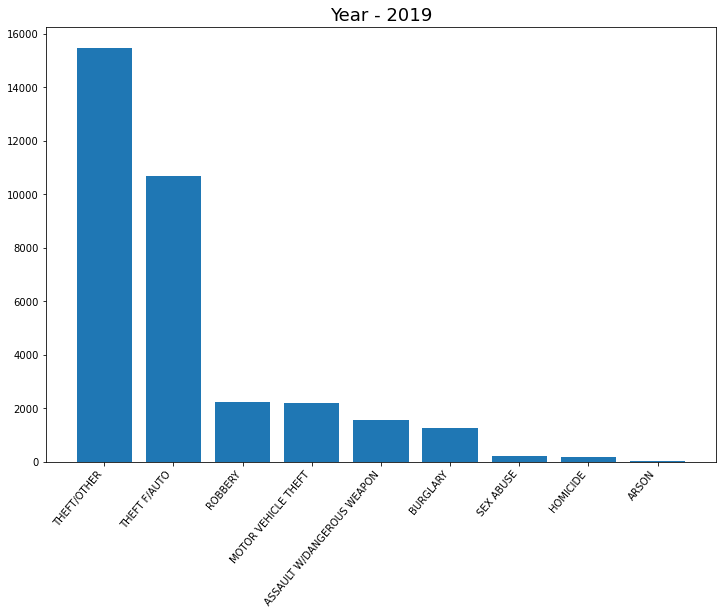

In [19]:
df_date_sorted_2019 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2019])
df_date_sorted_2019 = df_date_sorted_2019.set_index(df_date_sorted_2019['START_DATE']) 
df_date_sorted_2019 = df_date_sorted_2019.sort_index()

classes_count_2019 = df_date_sorted_2019['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2019)), list(classes_count_2019.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2019.keys())))
ax.set_xticklabels(labels=list(classes_count_2019.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2019", fontsize=18)

Text(0.5, 1.0, 'Year - 2020')

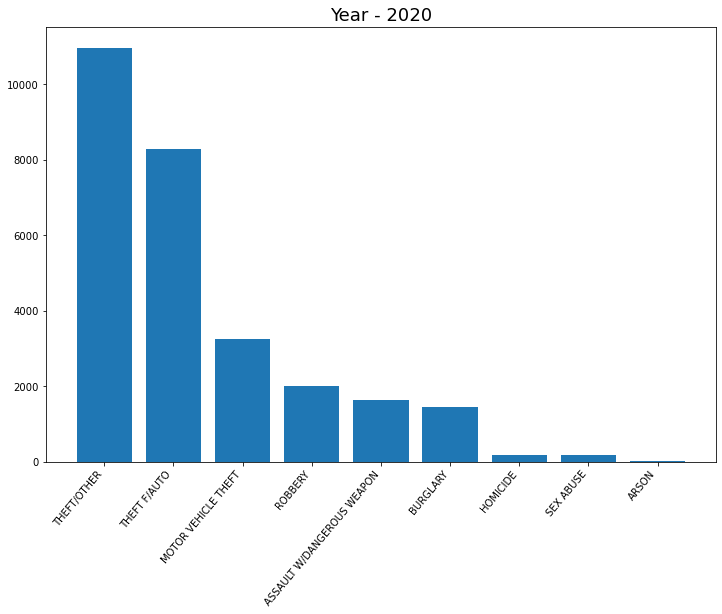

In [20]:
df_date_sorted_2020 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2020])
df_date_sorted_2020 = df_date_sorted_2020.set_index(df_date_sorted_2020['START_DATE']) 
df_date_sorted_2020 = df_date_sorted_2020.sort_index()

classes_count_2020 = df_date_sorted_2020['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2020)), list(classes_count_2020.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2020.keys())))
ax.set_xticklabels(labels=list(classes_count_2020.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2020", fontsize=18)

Text(0.5, 1.0, 'Year - 2021')

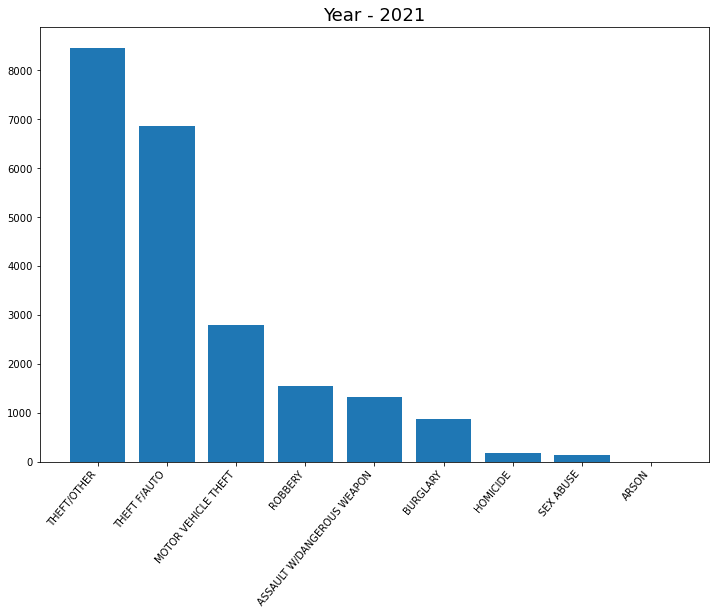

In [21]:
df_date_sorted_2021 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2021])
df_date_sorted_2021 = df_date_sorted_2021.set_index(df_date_sorted_2021['START_DATE'])
df_date_sorted_2021 = df_date_sorted_2021.sort_index()

classes_count_2021 = df_date_sorted_2021['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2021)), list(classes_count_2021.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2021.keys())))
ax.set_xticklabels(labels=list(classes_count_2021.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2021", fontsize=18)

GeoPandas dataframe setup for annual hotspot

In [22]:
crs=CRS('EPSG:4326')
geo_precovid = precovid.copy()
geo_covid = covid.copy()

geometry_pre_covid_2017 = [Point(xy) for xy in zip(df_date_sorted_2017['LONGITUDE'], df_date_sorted_2017['LATITUDE'])]
# create GeoPandas dataframe
geo_df_pre_covid_2017 = gpd.GeoDataFrame(df_date_sorted_2017,
 crs = crs,
 geometry = geometry_pre_covid_2017)

geometry_pre_covid_2018 = [Point(xy) for xy in zip(df_date_sorted_2018['LONGITUDE'], df_date_sorted_2018['LATITUDE'])]
# create GeoPandas dataframe
geo_df_pre_covid_2018 = gpd.GeoDataFrame(df_date_sorted_2018,
 crs = crs,
 geometry = geometry_pre_covid_2018)

geometry_pre_covid_2019 = [Point(xy) for xy in zip(df_date_sorted_2019['LONGITUDE'], df_date_sorted_2019['LATITUDE'])]
# create GeoPandas dataframe
geo_df_pre_covid_2019 = gpd.GeoDataFrame(df_date_sorted_2019,
 crs = crs,
 geometry = geometry_pre_covid_2019)

geometry_post_covid_2020 = [Point(xy) for xy in zip(df_date_sorted_2020['LONGITUDE'], df_date_sorted_2020['LATITUDE'])]
# create GeoPandas dataframe
geo_df_post_covid_2020 = gpd.GeoDataFrame(df_date_sorted_2020,
 crs = crs,
 geometry = geometry_post_covid_2020)

geometry_post_covid_2021 = [Point(xy) for xy in zip(df_date_sorted_2021['LONGITUDE'], df_date_sorted_2021['LATITUDE'])]
# create GeoPandas dataframe
geo_df_post_covid_2021 = gpd.GeoDataFrame(df_date_sorted_2021,
 crs = crs,
 geometry = geometry_post_covid_2021)

CRSError: Invalid projection: EPSG:4326: (Internal Proj Error: proj_create: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

#####DC Crime Hotspot - 2017

NameError: name 'border_map' is not defined

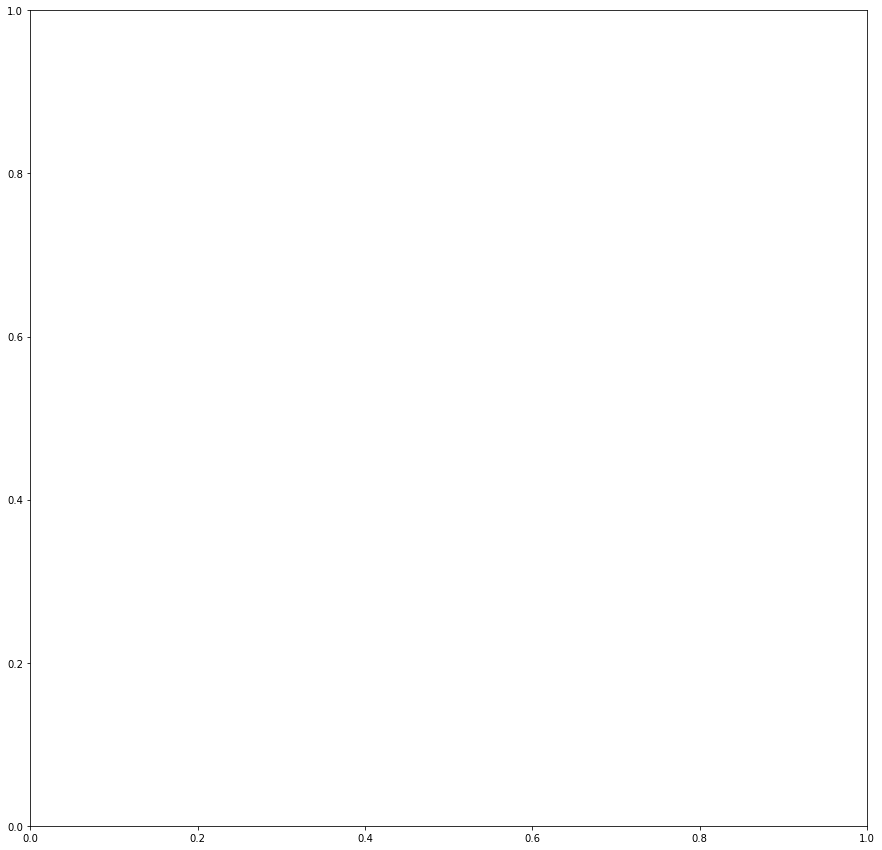

In [23]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_pre_covid_2017.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Pre-Covid 2017')

#####DC Crime Hotspot - 2018



In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_pre_covid_2018.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Pre-Covid 2018')

#####DC Crime Hotspot - 2019


In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_pre_covid_2019.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Pre-Covid 2019')

##### DC Crime Hotspot - 2020

In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_post_covid_2020.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Covid 2020')

##### DC Crime Hotspot - 2021

In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_post_covid_2021.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Covid 2021')

##### Plot accumulative hotspot for Pre-Covid and Covid timeframes

In [24]:
geometry_pre_covid = [Point(xy) for xy in zip(geo_precovid['LONGITUDE'], geo_precovid['LATITUDE'])]
geo_df_pre_covid = gpd.GeoDataFrame(geo_precovid, crs = crs, geometry = geometry_pre_covid)

geometry_post_covid = [Point(xy) for xy in zip(geo_covid['LONGITUDE'], geo_covid['LATITUDE'])]
geo_df_post_covid = gpd.GeoDataFrame(geo_covid, crs = crs, geometry = geometry_post_covid)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# add .shp mapfile to axes
border_map.plot(ax=ax[0], alpha=0.1, color='green')
street_map.plot(ax=ax[0], alpha=0.5, color='black')
# overlay samples
geo_df_pre_covid.plot(column='OFFENSE',ax=ax[0],alpha=0.5, legend=True,markersize=10)
# add title to graph
ax[0].title.set_text('DC Area - Pre-Covid (01/2017-03/2020)')

# add .shp mapfile to axes
border_map.plot(ax=ax[1], alpha=0.1, color='green')
street_map.plot(ax=ax[1], alpha=0.8, color='black')
# overlay samples
geo_df_post_covid.plot(column='OFFENSE',ax=ax[1],alpha=0.5, legend=True,markersize=10)
# add title to graph
ax[1].title.set_text('DC Area - During COVID [03/2020-11/2021)')

fig.tight_layout()

NameError: name 'geo_precovid' is not defined

#### Correlation Heatmap Pre-COVID

Text(0.5, 1.0, 'Correlation Heatmap Pre-COVID')

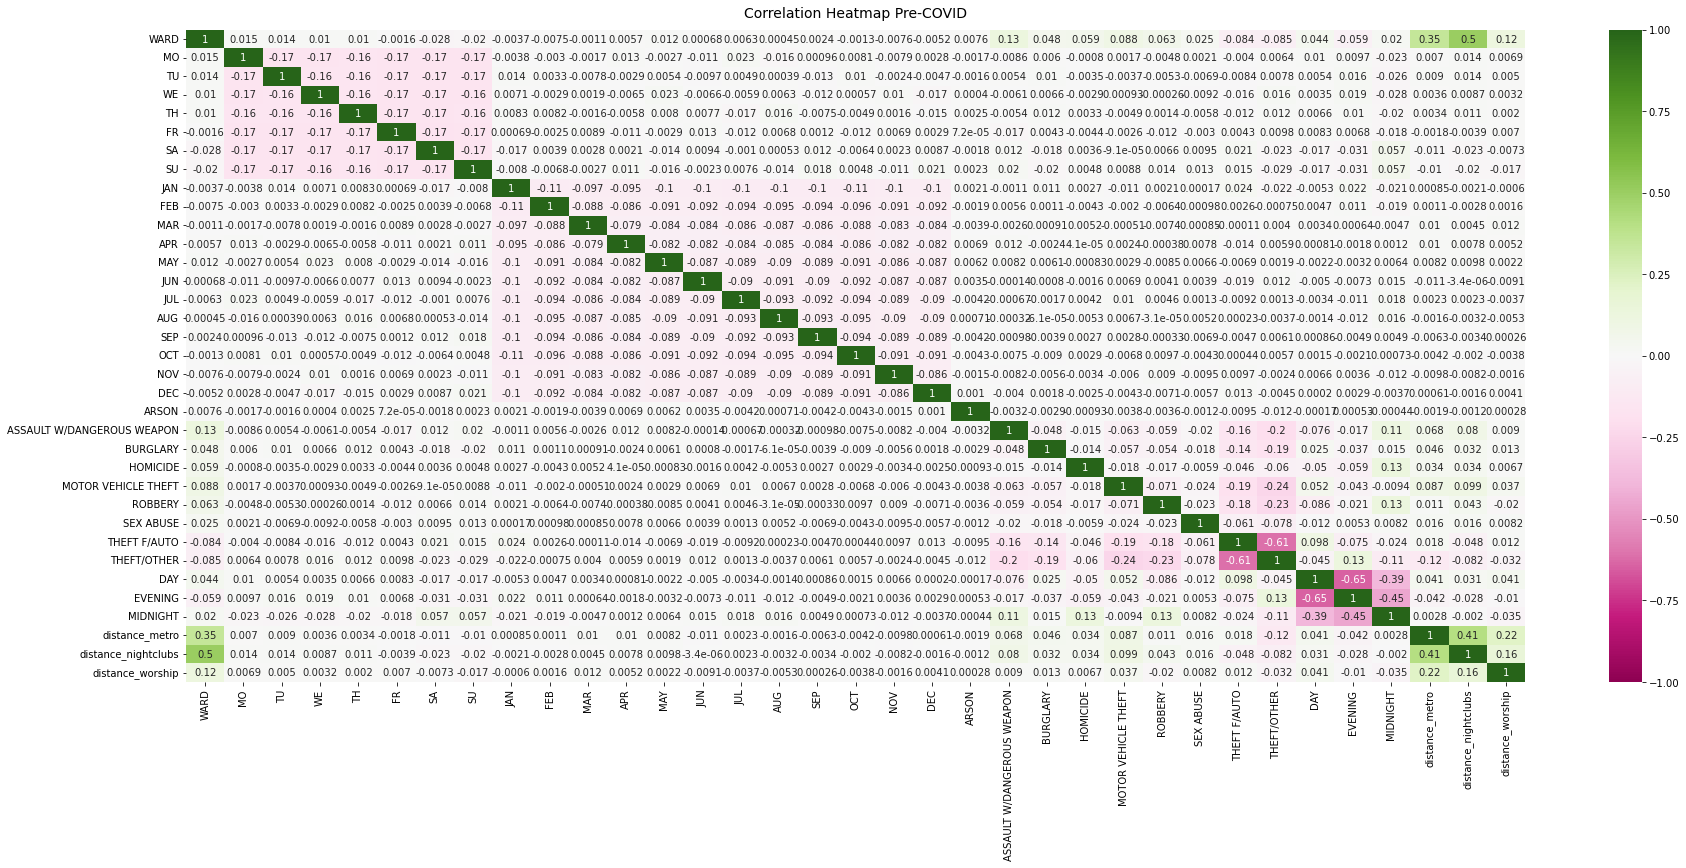

In [25]:
plt.figure(figsize = (30,12))
precovid_hm = precovid.drop(columns=['Unnamed: 0', 'LATITUDE', 'LONGITUDE','total_cases', 'daily_cases', 'daily_death',
       'OUT_POSITIVE_QUARANTINE_PSMPD', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8'])
heatmap = sns.heatmap(precovid_hm.corr(), vmin= -1, vmax = 1, annot = True, cmap="PiYG")

heatmap.set_title('Correlation Heatmap Pre-COVID', fontdict = {'fontsize':14}, pad = 12)

#### Correlation Heatmap Covid

Text(0.5, 1.0, 'Correlation Heatmap During COVID')

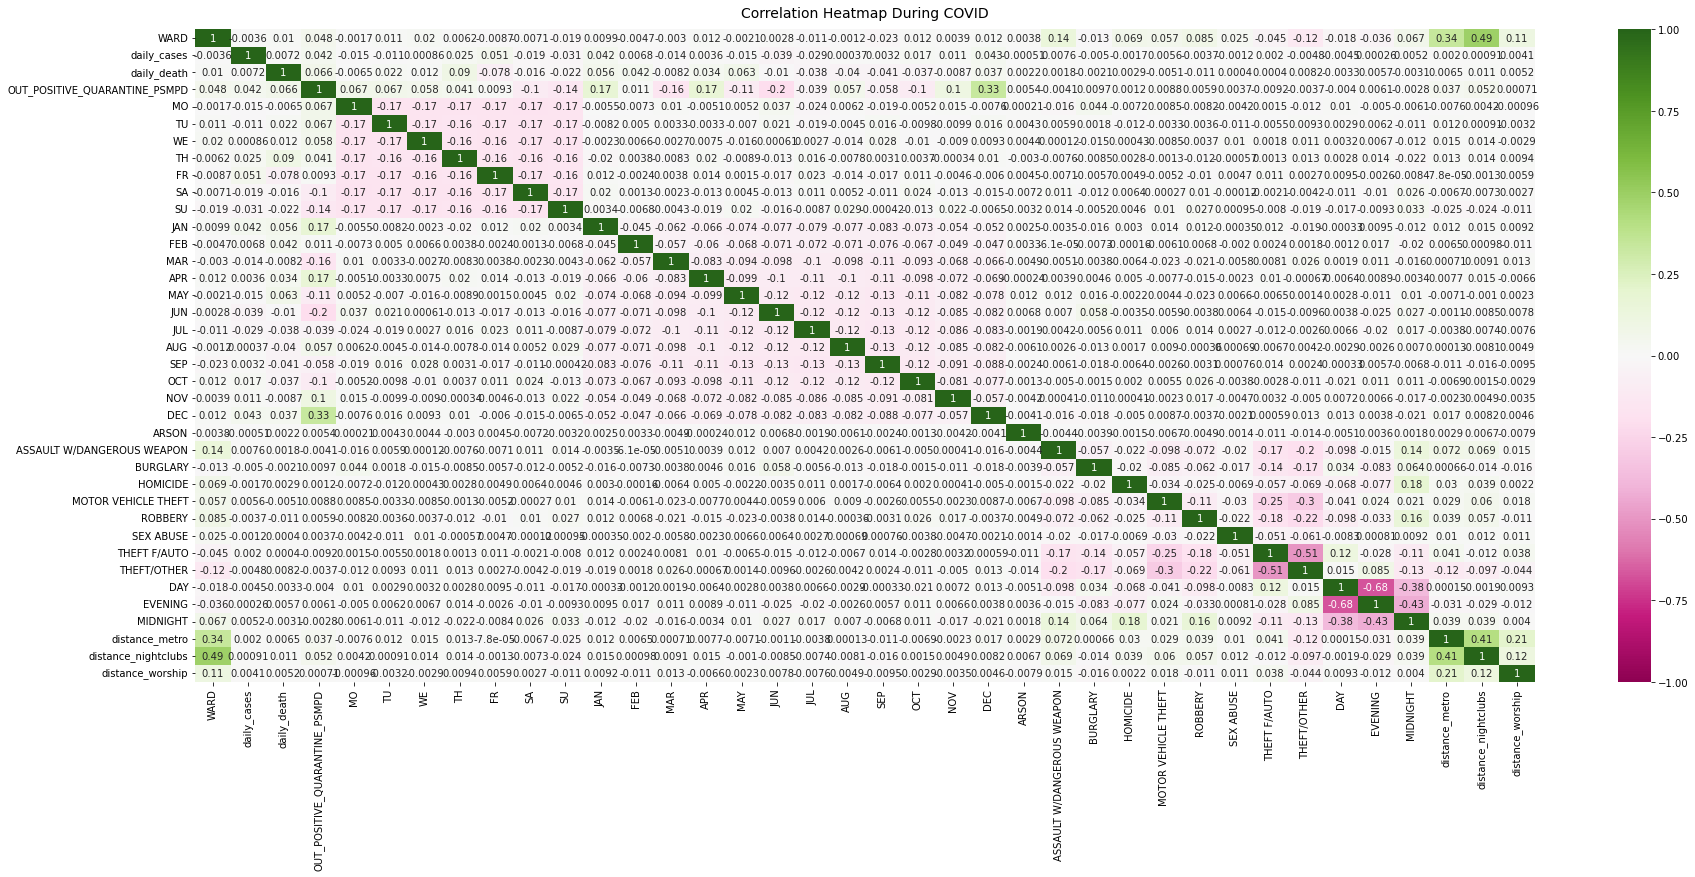

In [26]:
plt.figure(figsize = (30,12))
covid_hm = covid.drop(columns=['Unnamed: 0', 'LATITUDE', 'LONGITUDE','total_cases', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8'])
heatmap = sns.heatmap(covid_hm.corr(), vmin= -1, vmax = 1, annot = True, cmap='PiYG')

heatmap.set_title('Correlation Heatmap During COVID', fontdict = {'fontsize':14}, pad = 12)

### Data Processing for Model Training

In [27]:
pre_covid_data = precovid.drop(columns=['Unnamed: 0', 'SHIFT','OFFENSE', 'LATITUDE', 'LONGITUDE', 'ward_1', 'ward_2', 
                                              'ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8'])
covid_data = covid.drop(columns=['Unnamed: 0', 'SHIFT','OFFENSE', 'LATITUDE', 'LONGITUDE', 'ward_1', 'ward_2', 
                                              'ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8'])

pre_covid_data['WARD'] = pre_covid_data['WARD'].astype(int)
covid_data['WARD'] = covid_data['WARD'].astype(int)

In [28]:
pre_covid_data.sample(3)

,WARD,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
13992,1,2017-09-15,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.191788,0.200170,0.102039
6476,2,2017-04-08,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.176565,0.239003,0.098538
103990,8,2020-01-27,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.150960,0.687860,0.137208


In [29]:
covid_data.sample(3)

,WARD,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
26931,5,2021-09-08,56859.0,165.0,1.0,59.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.535372,1.342877,0.408259
23136,2,2021-04-10,45830.0,196.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.161712,0.153332,0.065970
8092,5,2020-05-17,7270.0,147.0,9.0,83.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.569399,0.146149,0.137123


In [30]:
# Baseline:
x_PRE_COVID_baseline_not_scaled = pre_covid_data.loc[:, pre_covid_data.columns != 'WARD']
del x_PRE_COVID_baseline_not_scaled["total_cases"]
del x_PRE_COVID_baseline_not_scaled["daily_cases"]
del x_PRE_COVID_baseline_not_scaled["daily_death"]
del x_PRE_COVID_baseline_not_scaled["OUT_POSITIVE_QUARANTINE_PSMPD"]

x_COVID_baseline_not_scaled = covid_data.loc[:, pre_covid_data.columns != 'WARD']

# Experiment:
x_PRE_COVID_experiment_not_scaled = covid_data.loc[:, pre_covid_data.columns != 'WARD']
del x_PRE_COVID_experiment_not_scaled["total_cases"]
del x_PRE_COVID_experiment_not_scaled["daily_cases"]
del x_PRE_COVID_experiment_not_scaled["daily_death"]
del x_PRE_COVID_experiment_not_scaled["OUT_POSITIVE_QUARANTINE_PSMPD"]

x_COVID_experiment_not_scaled = pre_covid_data.loc[:, pre_covid_data.columns != 'WARD']

# Labels:
y_PRE_COVID_base = pre_covid_data['WARD']
y_COVID_base = covid_data['WARD']

y_PRE_COVID_experiment = covid_data['WARD']
y_COVID_experiment = pre_covid_data['WARD']

In [31]:
x_PRE_COVID_baseline_not_scaled.sample(3)

,date,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
21788,2017-04-12,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.866249,0.691355,0.099580
22729,2017-07-02,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.213495,0.780805,0.106324
92200,2019-05-10,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.133603,0.456444,0.054613


In [32]:
x_COVID_baseline_not_scaled.sample(3)

,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
31380,2021-09-30,61153.0,0.0,2.0,43.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.928331,1.151887,0.191768
21839,2021-03-02,40818.0,51.0,4.0,27.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.139639,0.110233,0.028754
33806,2021-10-02,0.0,0.0,0.0,43.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.542865,0.068669,0.048564


In [33]:
x_PRE_COVID_experiment_not_scaled.sample(3)

,date,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
28193,2021-05-12,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.002125,0.168538,0.032278
12115,2020-04-14,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.192431,0.212798,0.052260
24582,2021-02-15,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.561481,0.516670,0.041215


In [34]:
x_COVID_experiment_not_scaled.sample(3)

,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
17761,2017-11-28,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0.604486,0.670601,0.144963
71853,2019-04-01,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.000443,0.497135,0.068532
50905,2018-12-19,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.434664,1.213097,0.115671


In [35]:
del x_PRE_COVID_baseline_not_scaled['date']
del x_COVID_baseline_not_scaled['date']
del x_PRE_COVID_experiment_not_scaled['date']
del x_COVID_experiment_not_scaled['date']

### ML Algorithms


1.   Logistic Regression
2.   Decision Tree ------------------ This should be removed, right?
2.   Random Forest
3.   Gradient Boost
4.   KNN
5.   SVC

#### Function that splits the dataset with 5 different random seeds and trains each model. Once the models are trained, accuracy, precision and recall values are returned. 

In [57]:
def cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, x_COVID_baseline_not_scaled, y_COVID_base, 
                     x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, x_COVID_experiment_not_scaled, y_COVID_experiment,
                     precovid_model, covid_model, is_rf):   
  # get original data
  random_state = [1, 10, 25, 40, 50]
  ###################
  cross_val_score_lst_PRE_COVID_MODEL_base = []
  pr_lst_PRE_COVID_MODEL_base = [] # list of [Precision, Recall] tuples from each Fold

  cross_val_score_lst_COVID_MODEL_base = []
  pr_lst_COVID_MODEL_base = [] # list of [Precision, Recall] tuples from each Fold

  ###################
  cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment = []
  pr_lst_PRE_COVID_MODEL_ON_COVID_experiment = []

  cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment = []
  pr_lst_COVID_MODEL_ON_PRE_COVID_experiment = []

  ###################
  # go through validation splits
  for val in range(0, 5):
      
      state_idx = val
      ############################
      #### GET Nth VALIDATION ####
      ############################
      # get Nth validation
      # Baseline:
      curr_X_train_PRE_COVID_unscaled_base, curr_X_test_PRE_COVID_unscaled_base, curr_y_train_PRE_COVID_base, curr_y_test_PRE_COVID_base = train_test_split(x_PRE_COVID_baseline_not_scaled, 
                                                                                                                                                            y_PRE_COVID_base,
                                                                                                                                                            test_size=0.3,
                                                                                                                                                            shuffle=True,
                                                                                                                                                            random_state=random_state[state_idx])
      
      curr_X_train_COVID_unscaled_base, curr_X_test_COVID_unscaled_base, curr_y_train_COVID_base, curr_y_test_COVID_base = train_test_split(x_COVID_baseline_not_scaled,
                                                                                                                                            y_COVID_base, 
                                                                                                                                            test_size=0.3, 
                                                                                                                                            shuffle=True,
                                                                                                                                            random_state=random_state[state_idx])
      # Experiment
      curr_X_train_PRE_COVID_unscaled_experiment, curr_X_test_PRE_COVID_unscaled_experiment, curr_y_train_PRE_COVID_experiment, curr_y_test_PRE_COVID_experiment = train_test_split(x_PRE_COVID_experiment_not_scaled,
                                                                                                                                                                                    y_PRE_COVID_experiment,
                                                                                                                                                                                    test_size=0.3, 
                                                                                                                                                                                    shuffle=True,
                                                                                                                                                                                    random_state=random_state[state_idx])
      
      curr_X_train_COVID_unscaled_experiment, curr_X_test_COVID_unscaled_experiment, curr_y_train_COVID_experiment, curr_y_test_COVID_experiment = train_test_split(x_COVID_experiment_not_scaled, 
                                                                                                                                                                    y_COVID_experiment, 
                                                                                                                                                                    test_size=0.3, 
                                                                                                                                                                    shuffle=True,
                                                                                                                                                                    random_state=random_state[state_idx])
      
      # Setup scaler and train on according baseline trains
      MinMax_scaler_PRE_COVID = MinMaxScaler(feature_range=(0, 1))
      MinMax_scaler_PRE_COVID = MinMax_scaler_PRE_COVID.fit(curr_X_train_PRE_COVID_unscaled_base) # Baseline Pre-COVID Train

      MinMax_scaler_COVID = MinMaxScaler(feature_range=(0, 1))
      MinMax_scaler_COVID = MinMax_scaler_COVID.fit(curr_X_train_COVID_unscaled_base) # Baseline COVID Train
      
      ####################
      #### SCALE DATA ####
      ####################
      # Scale the data (Base one, and experiment one)
      # For PRE_COVID:
      curr_x_train_PRE_COVID_base = MinMax_scaler_PRE_COVID.transform(curr_X_train_PRE_COVID_unscaled_base) # For training Pre-COVID model
      curr_x_test_PRE_COVID_base = MinMax_scaler_PRE_COVID.transform(curr_X_test_PRE_COVID_unscaled_base) # For testing Pre-COVID model (base)
      curr_x_test_PRE_COVID_on_COVID_experiment = MinMax_scaler_PRE_COVID.transform(curr_X_test_PRE_COVID_unscaled_experiment) # For testing Pre-COVID on COVID (experiment)

      # For COVID:
      curr_x_train_COVID_base = MinMax_scaler_COVID.transform(curr_X_train_COVID_unscaled_base) # For training COVID model
      curr_x_test_COVID_base = MinMax_scaler_COVID.transform(curr_X_test_COVID_unscaled_base) # For testing COVID model (base)
      curr_x_test_COVID_on_PRE_COVID_experiment = MinMax_scaler_COVID.transform(curr_X_test_COVID_unscaled_experiment) # For testing COVID on Pre-COVID (experiment)
      
      #############################
      #### PRE-COVID PRE-MODEL ####
      #############################
      curr_model_PRE_COVID = precovid_model
      curr_model_PRE_COVID.fit(curr_x_train_PRE_COVID_base, curr_y_train_PRE_COVID_base)
      if(is_rf == 1):
          importance = pd.Series(curr_model_PRE_COVID.feature_importances_, index = curr_X_test_PRE_COVID_unscaled_base.columns).sort_values(ascending = False)
          preAvg.append(importance.values)

      # Get Pre-COVID Baseline:
      curr_accuracy_PRE_COVID_base = accuracy_score(curr_y_test_PRE_COVID_base, 
                                                    curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base))
      curr_precision_PRE_COVID_base = precision_score(curr_y_test_PRE_COVID_base, 
                                                      curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base),
                                                      average='macro') 
      curr_recall_PRE_COVID_base = recall_score(curr_y_test_PRE_COVID_base, 
                                                curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base),
                                                average='macro')
      
      cross_val_score_lst_PRE_COVID_MODEL_base.append(curr_accuracy_PRE_COVID_base)
      pr_lst_PRE_COVID_MODEL_base.append([curr_precision_PRE_COVID_base, curr_recall_PRE_COVID_base])
      
      
      # Get Pre-COVID Experiment:
      curr_accuracy_PRE_COVID_experiment = accuracy_score(curr_y_test_PRE_COVID_experiment, 
                                                          curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment))
      curr_precision_PRE_COVID_experiment = precision_score(curr_y_test_PRE_COVID_experiment, 
                                                            curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment),
                                                            average='macro') 
      curr_recall_PRE_COVID_experiment = recall_score(curr_y_test_PRE_COVID_experiment, 
                                                      curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment),
                                                      average='macro')
      
      cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment.append(curr_accuracy_PRE_COVID_experiment)
      pr_lst_PRE_COVID_MODEL_ON_COVID_experiment.append([curr_precision_PRE_COVID_experiment, curr_recall_PRE_COVID_experiment])
      
      
      #########################
      #### COVID PRE-MODEL ####
      #########################
      curr_model_COVID = covid_model
      curr_model_COVID.fit(curr_x_train_COVID_base, curr_y_train_COVID_base)
      if(is_rf == 1):
          importance = pd.Series(curr_model_COVID.feature_importances_, index = curr_X_test_COVID_unscaled_base.columns).sort_values(ascending = False)
          postAvg.append(importance.values)

      # Get COVID Baseline:
      curr_accuracy_COVID_base = accuracy_score(curr_y_test_COVID_base, 
                                                curr_model_COVID.predict(curr_x_test_COVID_base))
      curr_precision_COVID_base = precision_score(curr_y_test_COVID_base, 
                                                  curr_model_COVID.predict(curr_x_test_COVID_base),
                                                  average='macro') 
      curr_recall_COVID_base = recall_score(curr_y_test_COVID_base, 
                                            curr_model_COVID.predict(curr_x_test_COVID_base),
                                            average='macro')
      
      cross_val_score_lst_COVID_MODEL_base.append(curr_accuracy_COVID_base)
      pr_lst_COVID_MODEL_base.append([curr_precision_COVID_base, curr_recall_COVID_base])
      
      
      # Get COVID Experiment:
      curr_accuracy_COVID_experiment = accuracy_score(curr_y_test_COVID_experiment, 
                                                      curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment))
      curr_precision_COVID_experiment = precision_score(curr_y_test_COVID_experiment, 
                                                        curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment),
                                                        average='macro') 
      curr_recall_COVID_experiment = recall_score(curr_y_test_COVID_experiment, 
                                                  curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment),
                                                  average='macro')
      
      cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment.append(curr_accuracy_COVID_experiment)
      pr_lst_COVID_MODEL_ON_PRE_COVID_experiment.append([curr_precision_COVID_experiment, curr_recall_COVID_experiment])
  return print("Dataset shapes:","  X_train_PRE_COVID_Baseline:", curr_X_train_PRE_COVID_unscaled_base.shape,
               "  X_train_PRE_COVID_Experiment:", curr_X_train_PRE_COVID_unscaled_experiment.shape,
               "  X_train_COVID_Baseline:", curr_X_train_COVID_unscaled_base.shape,
               "  X_train_COVID_Experiment:", curr_X_train_COVID_unscaled_experiment.shape,
               "\n",
               "PRE-COVID Model Baseline:",
               "Accuracy scores from each fold:", cross_val_score_lst_PRE_COVID_MODEL_base,
               "Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_base,
               '\n',
               "COVID Model Baseline:",
               "Accuracy scores from each fold:", cross_val_score_lst_COVID_MODEL_base,
               "Precision and Recall from each fold:", pr_lst_COVID_MODEL_base,
               '\n',
               "PRE-COVID Model Experiment (on COVID Data):",
               "Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment,
               "Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_ON_COVID_experiment,
               '\n',
               "COVID Model Experiment (on Pre-COVID Data):",
               "Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment,
               "Precision and Recall from each fold:", pr_lst_COVID_MODEL_ON_PRE_COVID_experiment,
               sep='\n')

#### Logisitic Regression

In [58]:
# set the hyperparameters for each model
precovid_lr = LogisticRegression(multi_class='multinomial', C=100, penalty='l2', solver='lbfgs', max_iter=200)
covid_lr = LogisticRegression(multi_class='multinomial', C=1000, penalty='l2', solver='lbfgs', max_iter=100)

In [59]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_lr, covid_lr, 0)

KeyboardInterrupt: 

#### Random Forest

In [60]:
precovid_rf = RandomForestClassifier(n_estimators = 800, max_depth = 2)
covid_rf = RandomForestClassifier(n_estimators = 800, max_depth = 2)
preAvg = []
postAvg = []

In [61]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_rf, covid_rf, 1)

Dataset shapes:
  X_train_PRE_COVID_Baseline:
(73051, 34)
  X_train_PRE_COVID_Experiment:
(30214, 34)
  X_train_COVID_Baseline:
(30214, 38)
  X_train_COVID_Experiment:
(73051, 38)


PRE-COVID Model Baseline:
Accuracy scores from each fold:
[0.3416059793024147, 0.34141433499425067, 0.3450875175673949, 0.35038967675993354, 0.3504216174779609]
Precision and Recall from each fold:
[[0.19020104177099, 0.27785651913118675], [0.19481782146877577, 0.27509552215766025], [0.19001272499299698, 0.2773027032814817], [0.19664129449190734, 0.27912326410149346], [0.19726908690753334, 0.2838325613999654]]


COVID Model Baseline:
Accuracy scores from each fold:
[0.34401544401544404, 0.34347490347490345, 0.34471042471042473, 0.3461776061776062, 0.3474131274131274]
Precision and Recall from each fold:
[[0.2951072723078436, 0.27924460934679185], [0.18047905948061227, 0.2784428312824392], [0.17915319397233037, 0.278935323194609], [0.2724491982649071, 0.2793182809410585], [0.18116609497071415, 0.280420581570

#### Gradient Boost

In [ ]:
precovid_gb = GradientBoostingClassifier()
covid_gb = GradientBoostingClassifier()

In [ ]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_gb, covid_gb, 0)

#### KNN

In [ ]:
precovid_knn = KNeighborsClassifier(n_neighbors=15, p=2, metric="minkowski", n_jobs=-1)
covid_knn = KNeighborsClassifier(n_neighbors=15, p=2, metric="minkowski", n_jobs=-1)

In [ ]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_knn, covid_knn, 0)

#### SVC
This model took over 8 hours to run. The results are copied over from a different notebook ([Github Link](https://github.com/joannechoi/DC-Crime-Analysis/blob/main/Training_Frameworks/Training_Pipeline_with_CV-SVC.ipynb))

In [ ]:
precovid_svc = SVC(C=41, kernel='rbf')
covid_svc = SVC(C=41, kernel='rbf')

In [ ]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_svc, covid_svc, 0)

In [ ]:
print("PRE-COVID Model Baseline:")
print("Accuracy scores from each fold:", cross_val_score_lst_PRE_COVID_MODEL_base)
print("Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_base)

In [ ]:
print("COVID Model Baseline:")
print("Accuracy scores from each fold:", cross_val_score_lst_COVID_MODEL_base)
print("Precision and Recall from each fold:", pr_lst_COVID_MODEL_base)

In [ ]:
print("PRE-COVID Model Experiment (on COVID Data):")
print("Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment)
print("Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_ON_COVID_experiment)

In [ ]:
print("COVID Model Experiment (on Pre-COVID Data):")
print("Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment)
print("Precision and Recall from each fold:", pr_lst_COVID_MODEL_ON_PRE_COVID_experiment)

## Results
We used the Wilcoxon signed-rank test between the baseline and experiment data on the pre-COVID and COVID models to determine if there was a significant difference between the models.

In [ ]:
# create Wilcoxon signed-rank test function
def wil(data1, data2):
    stat, p = wilcoxon(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')
        
# mean function
def average(lst):
    return mean(lst)

In [ ]:
# grab the accuracies for each model

#KNN
KNN_PRE_COVID_Model_Baseline = [0.39437204548358246, 0.3950108598441293, 0.3977577615944806, 0.3951066819982113, 0.39945061964992973]
KNN_COVID_Model_Baseline =[0.28463320463320463, 0.2925096525096525, 0.29011583011583014, 0.2911196911196911, 0.2965250965250965]
KNN_PRE_COVID_Model_Experiment =[0.35922779922779924, 0.3606949806949807, 0.3553667953667954, 0.36416988416988416, 0.3647104247104247]
KNN_COVID_Model_Experiment = [0.26660917337421747, 0.2668008176823815, 0.26469273029257695, 0.25990162258847577, 0.2683659128657212]

#LOGISTIC
LO_PRE_COVID_Model_Baseline = [0.43723648907627444, 0.4373323112303565, 0.4403666794429539, 0.4426344704228951, 0.44311358119330524]
LO_COVID_Model_Baseline =[0.44355212355212353, 0.4413899613899614, 0.44077220077220075, 0.43876447876447877, 0.4463320463320463]
LO_PRE_COVID_Model_Experiment =[0.4268725868725869, 0.42718146718146716, 0.42648648648648646, 0.4335907335907336, 0.43382239382239385]
LO_COVID_Model_Experiment = [0.430177590392232, 0.42324645458029897, 0.4341701801456497, 0.4249073719177207, 0.4322856777820365]

#Gradient Boost
GB_PRE_COVID_Model_Baseline = [0.5817682381499936, 0.5812891273795835, 0.5806822537370641, 0.5779353519867126, 0.5810655423533921]
GB_COVID_Model_Baseline =[0.5395366795366795, 0.5732046332046332, 0.5663320463320464, 0.5342084942084943, 0.5247876447876448]
GB_PRE_COVID_Model_Experiment =[0.5511969111969112, 0.5515057915057915, 0.5487258687258687, 0.542007722007722, 0.5466409266409267]
GB_COVID_Model_Experiment = [0.5391593203015204, 0.5735594736169669, 0.5663089306247604, 0.5399578382522039, 0.5280758911460329]

#Random Forest
RF_PRE_COVID_Model_Baseline = [0.3481218857799923, 0.34380988884630126, 0.35032579532387886, 0.35003832886163283, 0.35083684681231636]
RF_COVID_Model_Baseline =[0.3429343629343629, 0.34355212355212356, 0.34494208494208495, 0.34525096525096527, 0.3471042471042471]
RF_PRE_COVID_Model_Experiment =[0.3241698841698842, 0.3246332046332046, 0.32293436293436295, 0.31984555984555985, 0.3211583011583012]
RF_COVID_Model_Experiment = [0.32518845023636134, 0.32707295259997443, 0.3315765938418296, 0.32822281844895873, 0.3288935735275329]

#SVC
SVC_PRE_COVID_Model_Baseline = [0.46227801200970997, 0.4688897406413696, 0.4702631915165453, 0.46799540053660404, 0.46789957838252205]
SVC_COVID_Model_Baseline =[0.4365250965250965, 0.4327413127413127, 0.43644787644787647, 0.43853281853281856, 0.44193050193050193]
SVC_PRE_COVID_Model_Experiment =[0.44007722007722005, 0.4416988416988417, 0.4338996138996139, 0.4434749034749035, 0.4491891891891892]
SVC_COVID_Model_Experiment = [0.4104382266513351, 0.4137281206081513, 0.4187747540564712, 0.4155168008176824, 0.4204037306758656]

In [ ]:
# calculate the average for each model

#SVC
print("Average of the SVC Pre-COVID Baseline is",average(SVC_PRE_COVID_Model_Baseline))
print("Average of the SVC COVID  Baseline is",average(SVC_COVID_Model_Experiment))
print("Average of the SVC pre-COVID Experimental is",average(SVC_PRE_COVID_Model_Experiment))
print("Average of the SVC COVID Experimental is",average(SVC_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")

#LOGISTIC
print("Average of the Logistic Regression Pre-COVID Baseline is",average(LO_PRE_COVID_Model_Baseline))
print("Average of the Logistic Regression COVID  Baseline is",average(LO_COVID_Model_Experiment))
print("Average of the Logistic Regression pre-COVID Experimental is",average(LO_PRE_COVID_Model_Experiment))
print("Average of the Logistic Regression COVID Experimental is",average(LO_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")

#KNN 
print("Average of the KNN Pre-COVID Baseline is",average(KNN_PRE_COVID_Model_Baseline))
print("Average of the KNN COVID Baseline is",average(KNN_COVID_Model_Baseline))
print("Average of the KNN pre-COVID Experimental is",average(KNN_PRE_COVID_Model_Experiment))
print("Average of the KNN COVID Experimental is",average(KNN_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")

#Random Forest
print("Average of the Random Forest Pre-COVID Baseline is",average(RF_PRE_COVID_Model_Baseline))
print("Average of the Random Forest COVID  Baseline is",average(RF_COVID_Model_Experiment))
print("Average of the Random Forest pre-COVID Experimental is",average(RF_PRE_COVID_Model_Experiment))
print("Average of the Random Forest COVID Experimental is",average(RF_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")

#Gradient Boost
print("Average of the Gradient Boost Pre-COVID Baseline is",average(GB_PRE_COVID_Model_Baseline))
print("Average of the Gradient Boost COVID  Baseline is",average(GB_COVID_Model_Experiment))
print("Average of the Gradient Boost pre-COVID Experimental is",average(GB_PRE_COVID_Model_Experiment))
print("Average of the Gradient Boost COVID Experimental is",average(GB_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")

In [ ]:
print("------------------pre-covid Baseline V covid Baseline---------------------------")
print("SVC pre-covid baseline and covid baseline",wil(SVC_PRE_COVID_Model_Baseline,SVC_COVID_Model_Baseline))
print("--------------------------------------------------------------------------------")
print("Logistic pre-covid baseline and covid baseline",wil(LO_PRE_COVID_Model_Baseline,LO_COVID_Model_Baseline))
print("--------------------------------------------------------------------------------")
print("KNN pre-covid baseline and covid baseline",wil(KNN_PRE_COVID_Model_Baseline,KNN_COVID_Model_Baseline))
print("--------------------------------------------------------------------------------")
print("Random Forest pre-covid baseline and covid baseline",wil(RF_PRE_COVID_Model_Baseline,RF_COVID_Model_Baseline))
print("--------------------------------------------------------------------------------")
print("Gradient Boost pre-covid baseline and covid baseline",wil(GB_PRE_COVID_Model_Baseline,GB_COVID_Model_Baseline))
print("--------------------------------------------------------------------------------")

In [ ]:
print("------------------pre-covid Baseline V Pre-Covid Experimental-------------------")
print("SVC pre-covid baseline and pre-covid experimental",wil(SVC_PRE_COVID_Model_Baseline,SVC_PRE_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("Logistic pre-covid baseline and pre-covid experimental",wil(LO_PRE_COVID_Model_Baseline,LO_PRE_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("KNN pre-covid baseline and pre-covid experimental",wil(KNN_PRE_COVID_Model_Baseline,KNN_PRE_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("Random Forest pre-covid baseline and pre-covid experimental",wil(RF_PRE_COVID_Model_Baseline,RF_PRE_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("Gradient Boost pre-covid baseline and pre-covid experimental",wil(GB_PRE_COVID_Model_Baseline,GB_PRE_COVID_Model_Experiment))

In [ ]:
print("------------------covid Baseline V Pre-Covid Experimental-----------------------")
print("SVC covid baseline and covid experimental",wil(SVC_COVID_Model_Baseline,SVC_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("Logistic covid baseline and covid experimental",wil(LO_COVID_Model_Baseline,LO_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("KNN covid baseline and covid experimental",wil(KNN_COVID_Model_Baseline,KNN_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("Random Forest covid baseline and covid experimental",wil(RF_COVID_Model_Baseline,RF_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("Gradient Boost covid baseline and covid experimental",wil(GB_COVID_Model_Baseline,GB_COVID_Model_Experiment))

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[0], classes)

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[0], classes)

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[0], classes)

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[0], classes)

--------------------

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[1], classes)

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[1], classes)

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[1], classes)

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[1], classes)

--------------------

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[2], classes)

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[2], classes)

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[2], classes)

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[2], classes)

--------------------

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[3], classes)

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[3], classes)

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[3], classes)

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[3], classes)

--------------------

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[4], classes)

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[4], classes)

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[4], classes)

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[4], classes)

#### Feature Importance Comparsion between pre-COVID and COVID

0.31724960980168293
0.2242933077729615
0.1329048534735448
0.07762808544063146
0.06333048138446415
0.04405096341064253
0.036927837560285545
0.023313669455688895
0.019765719167622302
0.01608151780063326
0.014847406720142824
0.010296523999292376
0.007685663546630897
0.0033331343080052396
0.001989291972884151
0.0016679928291869234
0.000933534556561269
0.0006398236288752514
0.0004873995688933626
0.00042080656704241646
0.0003712093051871243
0.00030617808541716487
0.0002517959202187244
0.00022642983738002998
0.00020083724576782017
0.00017486010260565934
0.00014234390547900126
0.00011846897542365108
9.891790753137003e-05
7.960482124500264e-05
6.569064819558419e-05
4.944308902348595e-05
4.3017347091822235e-05
2.3579843761408337e-05


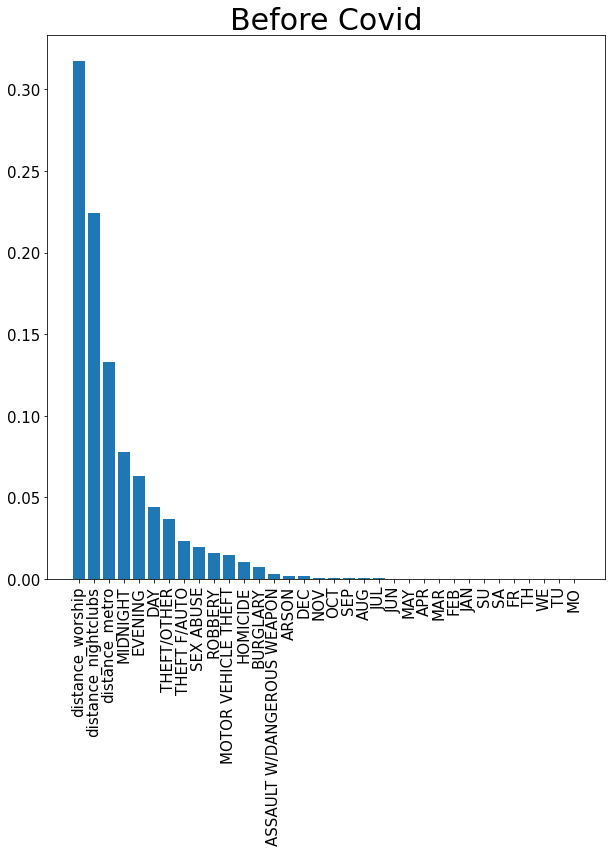

In [64]:
preAvg2 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
count = 0
for i in preAvg:
    preAvg2 = np.add(preAvg2, i)


for i in range(len(preAvg2)):
    preAvg2[i] = preAvg2[i]/5
for i in preAvg2:
    print(i)

    
precovid_importance = []
for i in x_PRE_COVID_baseline_not_scaled.columns:
    precovid_importance.append(i)

fig = plt.figure(figsize = (10,10))
plt.bar(precovid_importance[::-1], preAvg2)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Before Covid', fontsize = 30)
plt.show()

0.3327318554595923
0.23530534838066516
0.1395501659252924
0.0758340150197759
0.06372303233922486
0.034694446554510365
0.02781222508571387
0.02120917614337773
0.015314774146003388
0.013634453816568434
0.009985516831799797
0.006302025496430876
0.00506696872623668
0.004535169501422896
0.004049737123444559
0.0026533661347891866
0.0018407039911977926
0.0011283739343002821
0.0008105409073080156
0.0005683801231136327
0.00047225570842072365
0.00042022146664516915
0.0003597689784654649
0.0003316705832541983
0.0002945772541823536
0.00023944316111652528
0.0002023918657169669
0.00018487005216561873
0.00017184578135774004
0.0001467320363125413
0.00011526290011908804
0.0001070506485879885
7.958225468475467e-05
5.642462218478313e-05
4.293948448043129e-05
1.9479785905256933e-05
5.207775632308368e-06
0.0


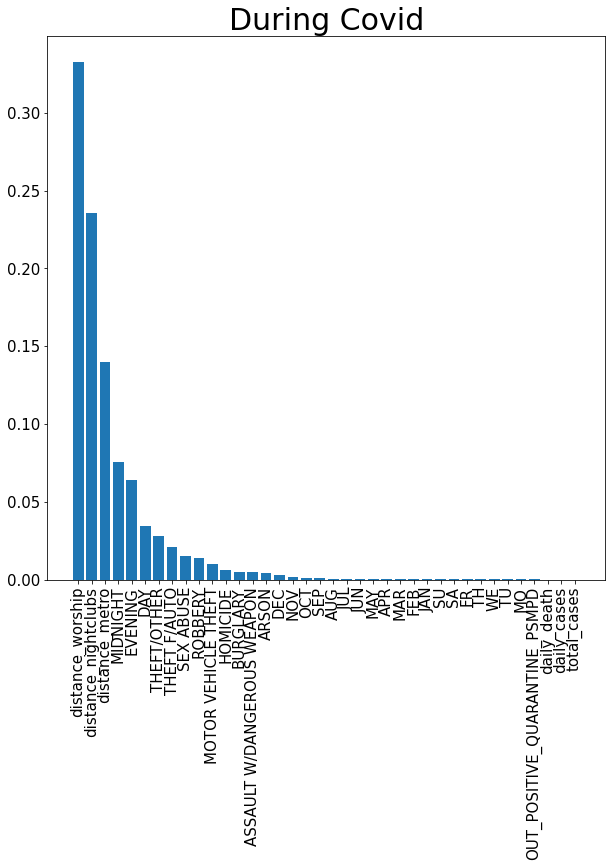

In [71]:
postAvg2 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
count = 0
for i in postAvg:
    postAvg2 = np.add(postAvg2, i)


for i in range(len(postAvg2)):
    postAvg2[i] = postAvg2[i]/5
for i in postAvg2:
    print(i)

    
covid_importance = []
for i in x_COVID_baseline_not_scaled.columns[::-1]:
    covid_importance.append(i)

fig = plt.figure(figsize = (10,10))
plt.bar(covid_importance, postAvg2)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('During Covid', fontsize = 30)
plt.show()